In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from xgboost import XGBClassifier
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv(r"/workspaces/Decision-tree-RF/data/clean-data (1).csv")
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [4]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
model = XGBClassifier(n_estimators = 300, learning_rate = 0.005, random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [7]:
accuracy_score(y_test, y_pred)

0.8275862068965517

In [8]:
# Evaluar el primer modelo en entrenamiento y prueba
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [9]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [10]:
get_metrics(y_train, y_test, train_pred, test_pred)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.870466,0.797844,0.836435,0.89697,0.718447,0.954424
Test,0.827586,0.698795,0.783288,0.72500,0.674419,0.892157
Diferencia,0.042880,0.099048,0.053147,0.17197,0.044028,0.062267


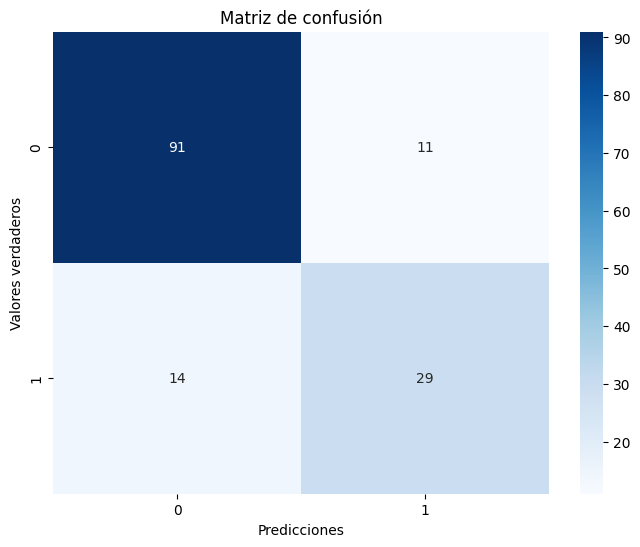

In [11]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de confusión')
plt.show()

In [12]:
# Optimización de hiperparámetros
param_grid = {
    'n_estimators': np.arange(100, 501, 50),
    'learning_rate': np.linspace(0, 0.01, 6)
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.01, 'n_estimators': 450}


In [13]:
# Predicciones
y_pred_opt = grid_search.predict(X_test)

# Evaluación del modelo
opt_accuracy = accuracy_score(y_test, y_pred_opt)
opt_accuracy

0.8275862068965517

In [14]:
# Evaluar el segundo modelo optimizacion en entrenamiento y prueba
test_pred_opt = grid_search.predict(X_test)
train_pred_opt = grid_search.predict(X_train)

In [15]:
get_metrics(y_train, y_test, train_pred_opt, test_pred_opt)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.955095,0.935644,0.946674,0.954545,0.917476,0.975871
Test,0.827586,0.719101,0.803466,0.695652,0.744186,0.862745
Diferencia,0.127509,0.216542,0.143208,0.258893,0.173290,0.113126


In [17]:
# Validación cruzada estratificada

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Definir el modelo con los hiperparámetros optimizados
model = XGBClassifier(n_estimators=450, learning_rate=0.01, random_state=42)

# Definir la estrategia de validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular la precisión mediante validación cruzada
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Imprimir los puntajes de precisión para cada pliegue
print("Precisión por pliegue:", scores)

# Calcular la precisión media y su desviación estándar
print("Precisión media:", scores.mean())
print("Desviación estándar de la precisión:", scores.std())

Precisión por pliegue: [0.76551724 0.77241379 0.7862069  0.77241379 0.74305556]
Precisión media: 0.7679214559386972
Desviación estándar de la precisión: 0.014133738177340299


Los resultados de la validación cruzada estratificada muestran que el modelo tiene una precisión bastante consistente en cada pliegue,
con puntajes que varían entre aproximadamente 0.743 y 0.786. La precisión media obtenida es de aproximadamente 0.768,
lo que indica que el modelo tiene un buen rendimiento en general en la clasificación de los datos.

La desviación estándar de la precisión es relativamente baja, alrededor de 0.014, lo que sugiere que los puntajes de precisión en los
diferentes pliegues no difieren mucho entre sí, lo que indica una buena estabilidad en el rendimiento del modelo.
En resumen, el modelo parece ser consistente y generaliza bien a través de los diferentes pliegues de la validación cruzada.

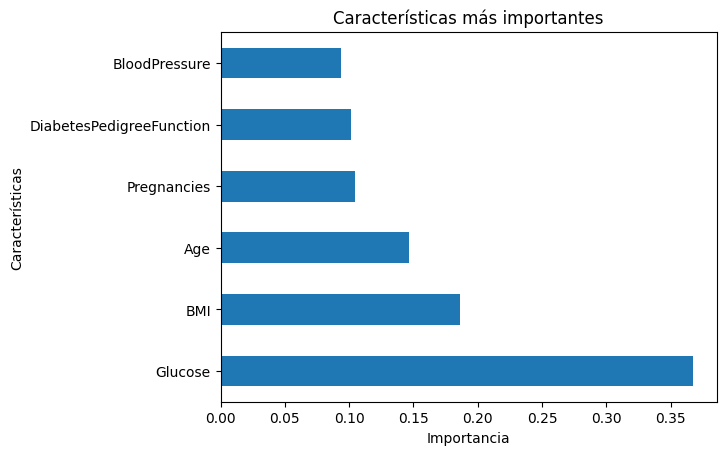

In [18]:
# Visualización de las características más importantes
feature_importance = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Características más importantes')
plt.show()